In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


/var/folders/8j/ybqbv42143jfglvsf83t5s_c0000gn/T/ipykernel_27766/961582660.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# Read the .zip data file
import zipfile
with zipfile.ZipFile('../data/permis-construction.csv.zip', 'r') as zip_ref:
    csv_file_name = zip_ref.namelist()[0]

    # Extract the CSV file from the .zip archive and read it into a DataFrame
    with zip_ref.open(csv_file_name) as file:
        df = pd.read_csv(file)

# Display the first few rows of the DataFrame
print(df.head())



/var/folders/8j/ybqbv42143jfglvsf83t5s_c0000gn/T/ipykernel_27766/3617261328.py:8: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


   no_demande   id_permis  date_debut date_emission  \
0  1200000876  1200006381  1994-05-16    1994-05-18   
1  1200002412  1200007323  1997-08-06    1997-08-07   
2  1200002441  1200007352  1997-08-08    1997-09-24   
3  1200002442  1200007354  1997-08-08    1997-09-24   
4  1200002443  1200007353  1997-08-08    1997-09-24   

                    emplacement                   arrondissement  \
0         121  rue Pierre-Panet  L'Île-Bizard - Sainte-Geneviève   
1              566  rue Simonet  L'Île-Bizard - Sainte-Geneviève   
2   1621  chemin du Bord-du-Lac  L'Île-Bizard - Sainte-Geneviève   
3   1621  chemin du Bord-du-Lac  L'Île-Bizard - Sainte-Geneviève   
4   1621  chemin du Bord-du-Lac  L'Île-Bizard - Sainte-Geneviève   

  code_type_base_demande       description_type_demande  \
0                     CO                   Construction   
1                     TR  Transformation - modification   
2                     DE                     Démolition   
3                     DE

In [6]:
# print the column names
print(list(df.columns))

['no_demande', 'id_permis', 'date_debut', 'date_emission', 'emplacement', 'arrondissement', 'code_type_base_demande', 'description_type_demande', 'description_type_batiment', 'description_categorie_batiment', 'nature_travaux', 'nb_logements', 'cout_traveaux_estimes', 'cout_permis_emis', 'LETTRE_DEBUT', 'LETTRE_FIN', 'longitude', 'latitude', 'loc_x', 'loc_y']


In [7]:
# rename the columns from french to english
new_columns = ['request_number', 'license_id', 'start_date', 'issue_date', 'location', 'district', 'request_base_code', 'request_type_description', 'building_type_description', 'building_category_description', 'work_nature', 'number_of_units', 'estimated_work_cost', 'issued_permit_cost', 'LETTER_START', 'LETTER_END', 'longitude', 'latitude', 'loc_x', 'loc_y']
df.columns = new_columns

In [8]:
# print the first few rows of the column work_nature
print(df['work_nature'].head(4))



0    EXPIRATION DU PERMIS 18 NOV. 1994., CONSTRUCTI...
1    RENOVATION INTERIEURE D'UNE RESI-, DENCE., CON...
2    DEMOLITION D'UNE RESIDENCE DE 9.44m, X 14.02 m...
3    DEMOLITION D'UNE GRANGE DE 9.44 m X, 11.88 m, ...
Name: work_nature, dtype: object


In [18]:
# find the words Construction, Renovation, and Demolition in the work_nature column
# Define a function to extract the specific words using regular expressions
import re
def extract_specific_word(text):
    if isinstance(text, str):  # Check if text is a string (not NaN)
        match = re.search(r'\b(CONSTRUCTION|RENOVATION|DEMOLITION)\b', text.upper())
        if match:
            return match.group()
    return None


# Apply the function to the 'work_nature' column and overwrite it
df['work_nature'] = df['work_nature'].apply(lambda x: extract_specific_word(x))



In [19]:
# print unique values in the request_type_description column
print(df.head(4))

   request_number  license_id  start_date  issue_date  \
0      1200000876  1200006381  1994-05-16  1994-05-18   
1      1200002412  1200007323  1997-08-06  1997-08-07   
2      1200002441  1200007352  1997-08-08  1997-09-24   
3      1200002442  1200007354  1997-08-08  1997-09-24   

                       location                         district  \
0         121  rue Pierre-Panet  L'Île-Bizard - Sainte-Geneviève   
1              566  rue Simonet  L'Île-Bizard - Sainte-Geneviève   
2   1621  chemin du Bord-du-Lac  L'Île-Bizard - Sainte-Geneviève   
3   1621  chemin du Bord-du-Lac  L'Île-Bizard - Sainte-Geneviève   

  request_base_code       request_type_description building_type_description  \
0                CO                   Construction               Résidentiel   
1                TR  Transformation - modification               Résidentiel   
2                DE                     Démolition               Résidentiel   
3                DE                     Démolition   

In [20]:
# drop unnecessary columns
columns_to_drop = ['request_number','license_id', 'location', 'district', 'request_type_description', 'building_category_description', 'LETTER_START','LETTER_END']
new_df = df
new_df.drop(columns_to_drop, axis=1, inplace=True)

In [21]:
new_df.head(2)


,start_date,issue_date,request_base_code,building_type_description,work_nature,number_of_units,estimated_work_cost,issued_permit_cost,longitude,latitude,loc_x,loc_y
0,1994-05-16,1994-05-18,CO,Résidentiel,CONSTRUCTION,1.0,110000.0,380.0,-73.869902,45.505224,275894.73,5040655.81
1,1997-08-06,1997-08-07,TR,Résidentiel,RENOVATION,0.0,8500.0,34.0,-73.873945,45.501934,275577.10,5040291.58


### Creating Data Column for Permit Approval Time


In [36]:
# convert issue date to datetime
data_df = new_df
data_df['issue_date'] = pd.to_datetime(data_df['issue_date'])
data_df['start_date'] = pd.to_datetime(data_df['start_date'])


In [37]:
# get approval time in days from start date and issue date
data_df['approval_time'] = data_df['issue_date'] - data_df['start_date']


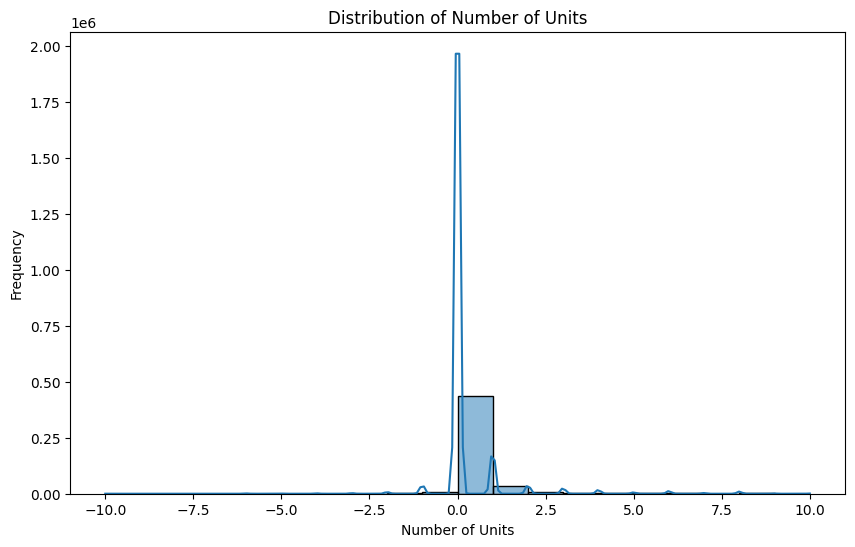

In [38]:
# remove outliers in the number of units column
data_df = data_df[(data_df['number_of_units'] >= -10) & (data_df['number_of_units'] <= 10)].reset_index(drop=True)

# distribution of number of units
plt.figure(figsize=(10, 6))
sns.histplot(data_df['number_of_units'], kde=True)
plt.title('Distribution of Number of Units')
plt.xlabel('Number of Units')
plt.ylabel('Frequency')
plt.show()


In [39]:
approval_time_df = data_df
approval_time_df.drop(['start_date', 'issue_date','loc_x', 'loc_y'], axis=1, inplace=True)

In [40]:
approval_time_df.drop(['estimated_work_cost', 'issued_permit_cost'], axis=1, inplace=True)

In [41]:
approval_time_df.head(5)

,request_base_code,building_type_description,work_nature,number_of_units,longitude,latitude,approval_time
0,CO,Résidentiel,CONSTRUCTION,1.0,-73.869902,45.505224,2 days
1,TR,Résidentiel,RENOVATION,0.0,-73.873945,45.501934,1 days
2,DE,Résidentiel,DEMOLITION,-1.0,-73.930681,45.492434,47 days
3,DE,Commercial,DEMOLITION,0.0,-73.930681,45.492434,47 days
4,CO,Résidentiel,CONSTRUCTION,1.0,-73.930681,45.492434,47 days


In [42]:
# remove rows with missing values
approval_time_df.dropna(inplace=True)
approval_time_df.isnull().sum()

request_base_code            0
building_type_description    0
work_nature                  0
number_of_units              0
longitude                    0
latitude                     0
approval_time                0
dtype: int64

In [43]:
approval_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26962 entries, 0 to 501215
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   request_base_code          26962 non-null  object         
 1   building_type_description  26962 non-null  object         
 2   work_nature                26962 non-null  object         
 3   number_of_units            26962 non-null  float64        
 4   longitude                  26962 non-null  float64        
 5   latitude                   26962 non-null  float64        
 6   approval_time              26962 non-null  timedelta64[ns]
dtypes: float64(3), object(3), timedelta64[ns](1)
memory usage: 1.6+ MB


In [45]:
# check for duplicated rows
print(f'Duplicated rows: {approval_time_df.duplicated().sum()} out of {len(approval_time_df)} rows')
# drop duplicated rows
approval_time_df.drop_duplicates(inplace=True)

Duplicated rows: 0 out of 25429 rows


In [46]:
print(f'Duplicated rows: {approval_time_df.duplicated().sum()} out of {len(approval_time_df)} rows')

Duplicated rows: 0 out of 25429 rows


In [47]:
# remove the days from the 'days_to_approval' column and convert to integer
approval_time_df['approval_time'] = approval_time_df['approval_time'].dt.days.astype('int')


In [49]:
# remove the column 'request_base_code'
approval_time_df.drop(['request_base_code'], axis=1, inplace=True)
approval_time_df.head(5)

,building_type_description,work_nature,number_of_units,longitude,latitude,approval_time
0,Résidentiel,CONSTRUCTION,1.0,-73.869902,45.505224,2
1,Résidentiel,RENOVATION,0.0,-73.873945,45.501934,1
2,Résidentiel,DEMOLITION,-1.0,-73.930681,45.492434,47
3,Commercial,DEMOLITION,0.0,-73.930681,45.492434,47
4,Résidentiel,CONSTRUCTION,1.0,-73.930681,45.492434,47


### Convert the data into training and test set and store the test set separately in order to check our model.

In [50]:

# absolute value of 80% of the data will be used for training
training_length = np.abs(0.8*len(approval_time_df))
training_df = approval_time_df.head(int(training_length))
len(training_df)
# remaining 20% of the data will be used for testing
testing_df = approval_time_df.tail(len(approval_time_df) - len(training_df))
len(testing_df)

5086

In [51]:
# save the testing csv file
testing_df.to_csv('../data/permit-time-testing.csv', index=False)

In [52]:
# encode building type description
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create a OneHotEncoder object
onehot_encoder = OneHotEncoder()

# Encode the work nature
encoded_work_nature = onehot_encoder.fit_transform(training_df['work_nature'].values.reshape(-1,1)).toarray()

print(encoded_work_nature)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [53]:
# Create a OneHotEncoder object
onehot_encoder = OneHotEncoder()

# Encode the building type description
encoded_building_type = onehot_encoder.fit_transform(training_df['building_type_description'].values.reshape(-1,1)).toarray()

print(encoded_building_type)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [55]:
# Create a dataframe from the encoded work nature
work_nature_df = pd.DataFrame(encoded_work_nature, columns=['construction', 'demolition', 'renovation'])

# Concatenate the dataframes
training_df = pd.concat([training_df, work_nature_df], axis=1)
training_df.head(5)

,building_type_description,work_nature,number_of_units,longitude,latitude,approval_time,construction,demolition,renovation
0,Résidentiel,CONSTRUCTION,1.0,-73.869902,45.505224,2.0,1.0,0.0,0.0
1,Résidentiel,RENOVATION,0.0,-73.873945,45.501934,1.0,0.0,0.0,1.0
2,Résidentiel,DEMOLITION,-1.0,-73.930681,45.492434,47.0,0.0,1.0,0.0
3,Commercial,DEMOLITION,0.0,-73.930681,45.492434,47.0,0.0,1.0,0.0
4,Résidentiel,CONSTRUCTION,1.0,-73.930681,45.492434,47.0,1.0,0.0,0.0


In [56]:
# add the encoded building types to the dataframe
building_types_df = pd.DataFrame(encoded_building_type, columns=['building_type_'+str(int(i)) for i in range(encoded_building_type.shape[1])])
training_df = pd.concat([training_df, building_types_df], axis=1)

# drop the building type description column
training_df.drop('building_type_description', axis=1, inplace=True)
training_df.head(5)

,work_nature,number_of_units,longitude,latitude,approval_time,construction,demolition,renovation,building_type_0,building_type_1,...,building_type_26,building_type_27,building_type_28,building_type_29,building_type_30,building_type_31,building_type_32,building_type_33,building_type_34,building_type_35
0,CONSTRUCTION,1.0,-73.869902,45.505224,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RENOVATION,0.0,-73.873945,45.501934,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DEMOLITION,-1.0,-73.930681,45.492434,47.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DEMOLITION,0.0,-73.930681,45.492434,47.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CONSTRUCTION,1.0,-73.930681,45.492434,47.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
training_df['building_type_5'].value_counts()

building_type_5
0.0    20342
1.0        1
Name: count, dtype: int64

In [35]:
#  encode request base code
# Create a LabelEncoder object
# label_encoder = LabelEncoder()
# # Fit and transform the request base code
# encoded_request_base_code = label_encoder.fit_transform(training_df['request_base_code'])
# print(encoded_request_base_code)


[1 3 2 ... 4 4 4]


In [ ]:
# # Create a dataframe from the encoded request base code
# request_base_code_df = pd.DataFrame(encoded_request_base_code, columns=['request_code'])
# # Concatenate the dataframes
# training_df = pd.concat([training_df, request_base_code_df], axis=1)

# # drop the request base code column
# training_df.drop('request_base_code', axis=1, inplace=True)
# training_df.head(5)


In [28]:
# # onhot encode the request base code
# encoded_request_base_code = onehot_encoder.fit_transform(training_df['request_base_code'].values.reshape(-1,1)).toarray()
# # add the encoded request base code to the dataframe
# request_base_code_df = pd.DataFrame(encoded_request_base_code, columns=['request_base_code_'+str(int(i)) for i in range(encoded_request_base_code.shape[1])])
# training_df = pd.concat([training_df, request_base_code_df], axis=1)
# # drop the request base code column
# training_df.drop('request_base_code', axis=1, inplace=True)
# training_df.head(5)

In [ ]:
# put approval_time column at the end of the dataframe
cols = list(training_df.columns.values)
cols.pop(cols.index('approval_time'))
training_df = training_df[cols+['approval_time']]
training_df.head(5)

In [65]:
# drop work_nature column
training_df.drop('work_nature', axis=1, inplace=True)
training_df.head(5)

,number_of_units,longitude,latitude,construction,demolition,renovation,building_type_0,building_type_1,building_type_2,building_type_3,...,building_type_27,building_type_28,building_type_29,building_type_30,building_type_31,building_type_32,building_type_33,building_type_34,building_type_35,approval_time
0,1.0,-73.869902,45.505224,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,-73.873945,45.501934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.0,-73.930681,45.492434,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0
3,0.0,-73.930681,45.492434,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0
4,1.0,-73.930681,45.492434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0


In [66]:
# save the dataframe to csv
training_df.to_csv('../data/permit-time-training.csv', index=False)

In [67]:
# read the dataframe from csv
df = pd.read_csv('../data/permit-time-training.csv')
df.head(5)

,number_of_units,longitude,latitude,construction,demolition,renovation,building_type_0,building_type_1,building_type_2,building_type_3,...,building_type_27,building_type_28,building_type_29,building_type_30,building_type_31,building_type_32,building_type_33,building_type_34,building_type_35,approval_time
0,1.0,-73.869902,45.505224,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,-73.873945,45.501934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.0,-73.930681,45.492434,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0
3,0.0,-73.930681,45.492434,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0
4,1.0,-73.930681,45.492434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0


### Explore approval time column

In [76]:
# total number of rows in the dataframe
total_rows = len(df)
print(f'Total number of rows: {total_rows}')

Total number of rows: 37201


In [69]:
# check the max and min values of the approval_time column
print(df['approval_time'].max())
print(df['approval_time'].min())

41002.0
0.0


In [70]:
# count the number of rows with approval time between 30000 and 40000
print(df[(df['approval_time'] >= 30000) & (df['approval_time'] <= 40000)].shape[0])

542


In [77]:
# what is the range that contains 80% of the data in the approval_time column
print(df[(df['approval_time'] >= 0) & (df['approval_time'] <= 100)].shape[0])

16011
